# Cell type differences and effects of interferon stimulation on immune cells

Demonstrating differential expression between cell types and the effect of interferon stimulation within a cell type (CD4 T cells).

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import scanpy as sc
import scipy as sp
import itertools
import numpy as np
import scipy.stats as stats
from scipy.integrate import dblquad
import seaborn as sns
from statsmodels.stats.multitest import fdrcorrection
import imp
pd.options.display.max_rows = 999
pd.set_option('display.max_colwidth', -1)
import pickle as pkl
import time

In [12]:
%matplotlib inline

In [13]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'medium',
         'axes.labelsize': 'medium',
         'axes.titlesize':'medium',
         'figure.titlesize':'medium',
         'xtick.labelsize':'small',
         'ytick.labelsize':'small'}
pylab.rcParams.update(params)


In [14]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [15]:
import warnings
# warnings.filterwarnings('ignore')

In [16]:
from sklearn.decomposition import PCA

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
import sys
sys.path.append('/data/home/Github/scrna-parameter-estimation/schypo')
import estimator, simulate, schypo, bootstrap, util, hypothesis_test

In [19]:
fig_path = '/data/home/Github/scrna-parameter-estimation/figures/fig4/'
data_path = '/data/parameter_estimation/'

### Perform some basic filtering

In [20]:
cts = ['CD4 T cells',  'CD14+ Monocytes', 'FCGR3A+ Monocytes', 'NK cells','CD8 T cells', 'B cells']
label_converter = dict(zip(cts, ['Th', 'cM', 'ncM', 'NK', 'Tc', 'B']))

In [21]:
def simplify_name(name):
    return name.split('.')[0]

In [22]:
adata = sc.read(data_path + 'interferon_filtered.h5ad')


In [23]:
adata.obs['cell_type'] = (adata.obs['cell'].astype(str) + ' - ' + adata.obs['stim'].astype(str)).astype('category')

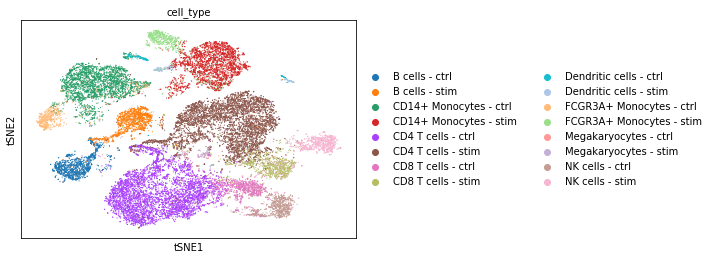

In [24]:
sc.pl.tsne(adata, color='cell_type')

In [25]:
# plt.figure(figsize=(5, 3))
# sns.boxplot(x='n_counts', y='cell_type', data=adata.obs)
# plt.title('Total UMI counts by cell type')
# plt.savefig('celltype_numi.pdf')
# plt.savefig('celltype_numi.png')

In [26]:
print('Number of genes kept:', adata.shape[1])

Number of genes kept: 35635


### Perform 1D hypothesis testing

In [43]:
imp.reload(hypothesis_test)
imp.reload(schypo)
imp.reload(bootstrap)
imp.reload(estimator)

<module 'estimator' from '/data/home/Github/scrna-parameter-estimation/scmemo/estimator.py'>

In [320]:
%%time
adata_dict = {}
for ct in cts:

    print('Processing:', ct)
    adata_dict[ct] = adata[adata.obs.cell == ct].copy()
#     adata_dict[ct].obs['stim'] = np.random.choice(adata_dict[ct].obs['stim'], adata_dict[ct].shape[0])
    schypo.create_groups(adata_dict[ct], label_columns=['stim', 'ind'], inplace=True, q=0.07)
    schypo.compute_1d_moments(
        adata_dict[ct], 
        inplace=True, 
        filter_genes=True,
        filter_mean_thresh=0.0, 
        min_perc_group=.9)
    print('Number of genes kept for {}: {}'.format(ct, adata_dict[ct].shape[1]))
    print('IFI6' in adata_dict[ct].var.index)
    schypo.ht_1d_moments(
        adata_dict[ct], 
        formula_like='1 + stim',
        cov_column='stim', 
        num_boot=10000, 
        verbose=1,
        num_cpus=6)

Processing: CD4 T cells
Number of genes kept for CD4 T cells: 6768
True


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    7.3s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:   29.4s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:  1.9min
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:  2.9min
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:  4.2min
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:  5.7min
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed:  7.5min
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed:  9.5min
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed: 11.7min
[Parallel(n_jobs=6)]: Done 6038 tasks      | elapsed: 14.1min
[Parallel(n_jobs=6)]: Done 6768 out of 6768 | elapsed: 15.8min finished


Processing: CD14+ Monocytes
Number of genes kept for CD14+ Monocytes: 5598
True


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    6.6s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:   32.3s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:  1.3min
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:  2.2min
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:  3.5min
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:  5.0min
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:  6.9min
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed:  9.0min
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed: 11.4min
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed: 14.1min
[Parallel(n_jobs=6)]: Done 5598 out of 5598 | elapsed: 15.9min finished


Processing: FCGR3A+ Monocytes
Number of genes kept for FCGR3A+ Monocytes: 1061
True


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    4.6s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:   21.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:   48.9s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:  1.5min
[Parallel(n_jobs=6)]: Done 1061 out of 1061 | elapsed:  2.0min finished


Processing: NK cells
Number of genes kept for NK cells: 816
True


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    3.2s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:   14.3s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:   34.2s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:  1.0min
[Parallel(n_jobs=6)]: Done 816 out of 816 | elapsed:  1.1min finished


Processing: CD8 T cells
Number of genes kept for CD8 T cells: 248
False


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    2.5s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:   12.9s
[Parallel(n_jobs=6)]: Done 248 out of 248 | elapsed:   17.3s finished


Processing: B cells
Number of genes kept for B cells: 1640
False


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    2.7s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:   12.7s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:   29.1s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:   53.2s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:  1.4min


CPU times: user 2min 2s, sys: 3.28 s, total: 2min 5s
Wall time: 37min 13s


[Parallel(n_jobs=6)]: Done 1640 out of 1640 | elapsed:  1.9min finished


In [321]:
# Save the result
for ct in cts:
    adata_dict[ct].write(data_path + 'result_1d/ifn/{}.h5ad'.format(label_converter[ct]))

... storing 'schypo_group' as categorical
... storing 'schypo_group' as categorical
... storing 'schypo_group' as categorical
... storing 'schypo_group' as categorical
... storing 'schypo_group' as categorical
... storing 'schypo_group' as categorical


### Read the hypothesis test result

In [375]:
adata_dict = {}
for ct in cts:
    adata_dict[ct] = sc.read(data_path + 'result_1d/ifn/{}.h5ad'.format(label_converter[ct]))

### Get a list of ISGF3 and IRF1 bound genes

In [499]:
distances = pd.read_csv(data_path + 'chipseq/union/intersect_distances.csv').rename(columns={'gene_name':'gene'})

In [500]:
distances.query('gene == "ISG20"')

,gene,distance
11347,ISG20,0


In [644]:
ct = 'CD14+ Monocytes'
temp = schypo.get_1d_ht_result(adata_dict[ct])
temp['de_fdr'] = util._fdrcorrect(temp['de_pval'])

In [647]:
temp.query('de_fdr < 0.1 & de_coef < 0').shape

(3104, 6)

In [826]:
def cut(x):
    
    if x < 1:
        return 'in TSS'
    elif x < 10000:
        return '$\pm$ 10k'
    else:
        return 'far'

In [827]:
ht_result_1d_dict = {}
for ct in ['CD14+ Monocytes', 'FCGR3A+ Monocytes']:
    ht_result_1d_dict[ct] = schypo.get_1d_ht_result(adata_dict[ct])
    ht_result_1d_dict[ct]['de_fdr'] = util._fdrcorrect(ht_result_1d_dict[ct]['de_pval'])
    ht_result_1d_dict[ct]['dv_fdr'] = util._fdrcorrect(ht_result_1d_dict[ct]['dv_pval'])
    
    ht_result_1d_dict[ct] = ht_result_1d_dict[ct].merge(distances, on='gene', how='left')
    ht_result_1d_dict[ct]['ct'] = label_converter[ct]
    
    ht_result_1d_dict[ct] = ht_result_1d_dict[ct].query('de_coef > 0 & de_fdr < 0.05').query('distance > -1')

    ht_result_1d_dict[ct]['distance_bin'] = ht_result_1d_dict[ct]['distance'].apply(cut)
    
    ht_result_1d_dict[ct]['distance_bin'] = pd.Categorical(ht_result_1d_dict[ct]['distance_bin'], ['in TSS', '$\pm$ 10k','far'])
    
    ht_result_1d_dict[ct] = ht_result_1d_dict[ct].sort_values('distance_bin')

ht_result_1d_all = pd.concat([df for ct, df in ht_result_1d_dict.items()])

In [839]:
ht_result_1d_dict['CD14+ Monocytes'].to_csv('cd14_1d_result.csv', index=False)

In [837]:
stats.kruskal(
    ht_result_1d_dict['CD14+ Monocytes'].query('distance_bin == "in TSS"').dv_coef,
    ht_result_1d_dict['CD14+ Monocytes'].query('distance_bin == "$\pm$ 10k"').dv_coef,
    ht_result_1d_dict['CD14+ Monocytes'].query('distance_bin == "far"').dv_coef
)

KruskalResult(statistic=29.749508624607643, pvalue=3.467179151284747e-07)

In [838]:
stats.kruskal(
    ht_result_1d_dict['FCGR3A+ Monocytes'].query('distance_bin == "in TSS"').dv_coef,
    ht_result_1d_dict['FCGR3A+ Monocytes'].query('distance_bin == "$\pm$ 10k"').dv_coef,
    ht_result_1d_dict['FCGR3A+ Monocytes'].query('distance_bin == "far"').dv_coef
)

KruskalResult(statistic=22.630382392146316, pvalue=1.218638520633799e-05)

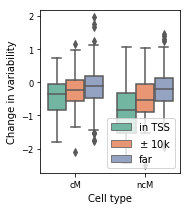

In [830]:
plt.figure(figsize=(2.5, 3))
sns.boxplot(x='ct', y='dv_coef', hue='distance_bin', data=ht_result_1d_all, palette='Set2')

plt.xlabel('Cell type'); plt.ylabel('Change in variability');
plt.legend(loc='lower right')
# plt.ylim(-.8, 0.6)
plt.savefig(fig_path + 'isgf3_vs_rest.pdf', bbox_inches='tight')



### Get some numbers

In [76]:
ht_result_1d_all.query('de_fdr < 0.05').gene.drop_duplicates().shape

(2032,)

In [78]:
ht_result_1d_all.query('dv_fdr < 0.1').gene.drop_duplicates().shape

(206,)

In [90]:
ht_result_1d_all.query('de_coef > 0 & dv_coef < 0 & de_fdr < 0.05 & dv_fdr < 0.1').gene.drop_duplicates().shape

(66,)

In [91]:
ht_result_1d_all.query('de_coef > 0 & dv_coef > 0 & de_fdr < 0.05 & dv_fdr < 0.1').gene.drop_duplicates().shape

(31,)

In [101]:
set(ht_result_1d_all.query('de_coef > 0 & dv_coef < 0 & de_fdr < 0.05 & dv_fdr < 0.1').gene.tolist()) & set(isgf3_genes)

{'BST2',
 'EPSTI1',
 'HSP90AB1',
 'IFI35',
 'IFI6',
 'IFIT1',
 'IFIT3',
 'IFITM3',
 'ISG15',
 'LAP3',
 'MX1',
 'MX2',
 'OAS1',
 'OASL',
 'PHF11',
 'PLSCR1',
 'PSMB9',
 'TNFSF10',
 'TNFSF13B'}

In [98]:
len(set(ht_result_1d_all.gene.tolist()) & set(isgf3_genes))

94

In [92]:
len(isgf3_genes)

328

### DE effect size vs DV effect size by cell type

In [250]:
def plot_de_dv(ct, result_df):
    
    de_diff = result_df['de_coef']
    dv_diff = result_df['dv_coef']
    de_fdr = result_df['de_fdr']
    dv_fdr = result_df['dv_fdr']
    
    plt.plot([0, 0], [np.nanmin(dv_diff), np.nanmax(dv_diff)], '--', lw=2, color='k')
    plt.plot([np.nanmin(de_diff), np.nanmax(de_diff)], [0, 0], '--', lw=2, color='k')
    
    de_sig = de_fdr < 0.05
    dv_sig = (dv_fdr < 0.1)
    dv_inc = dv_diff > 0
    dv_dec = dv_diff < 0
    
#     both_sig = de_sig & dv_sig

    plt.scatter(de_diff, dv_diff, s=1, color='grey', zorder=-1)
#     plt.scatter(de_diff[de_sig], dv_diff[de_sig], s=1, color='b')
    plt.scatter(de_diff[dv_sig & dv_inc], dv_diff[dv_sig & dv_inc], s=8, color='c', zorder=10)
    plt.scatter(de_diff[dv_sig & dv_dec], dv_diff[dv_sig & dv_dec], s=8, color='m', zorder=10)

#     plt.scatter(de_diff[both_sig], dv_diff[both_sig], s=1, color='m')
#     plt.xlim(-0.1, .1);
#     plt.ylim(-0.5, 0.3)
        
    plt.xlabel('$\Delta$Mean')
    if ct in ['NK cells', 'CD4 T cells']:
        plt.ylabel('$\Delta$Variability')
    
    print(ct, util.robust_correlation(de_diff[de_sig & dv_sig], dv_diff[de_sig & dv_sig]))

    plt.title(label_converter[ct])
#     plt.gca().xaxis.set_major_locator(plt.MultipleLocator(0.1))
#     plt.gca().yaxis.set_major_locator(plt.MultipleLocator(0.255))

CD4 T cells SpearmanrResult(correlation=-0.38496240601503756, pvalue=0.09372546338767992)
CD14+ Monocytes SpearmanrResult(correlation=-0.7408556125251785, pvalue=1.583436517270703e-23)
FCGR3A+ Monocytes SpearmanrResult(correlation=-0.5492917166866746, pvalue=3.6115793271137284e-05)


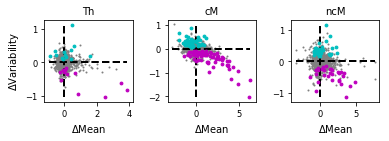

In [251]:
plt.figure(figsize=(6, 1.5))
plt.subplots_adjust(hspace=0.45, wspace=0.4)
for idx, ct in enumerate(cts[:3]):
    plt.subplot(1, 3, idx+1)
    plot_de_dv(ct, ht_result_1d_dict[ct])
plt.savefig(fig_path + 'de_vs_dv.png', bbox_inches='tight')
    

### Single gene example

In [794]:
def plot_bar_strip(gene, ct_to_include=None):
    
    ct_list = cts if ct_to_include is None else ct_to_include
    expr_df_list = []
    for ct in ct_list:
        if gene in adata_dict[ct].var.index:
            gene_idx = adata_dict[ct].var.index.tolist().index(gene)
            for group in adata_dict[ct].uns['schypo']['groups']:
                expr_df_list.append((label_converter[ct], group.split('^')[0], group.split('^')[1], np.log(adata_dict[ct].uns['schypo']['1d_moments'][group][0][gene_idx]), np.log(adata_dict[ct].uns['schypo']['1d_moments'][group][2][gene_idx])))
    expr_df = pd.DataFrame(expr_df_list, columns=['ct','ind', 'stim', 'mean', 'variability'])

#     plt.figure(figsize=(3, 3))
    plt.subplots_adjust(hspace=0.1)

    plt.subplot(2, 1, 1)
    plt.title('{} expression in response to IFN-B'.format(gene))

    ax = sns.boxplot(x='ct', y='mean', data=expr_df, hue='stim', palette=sns.color_palette('Set2'))
    ax = sns.stripplot(x='ct', y='mean', data=expr_df, hue='stim', dodge=True, palette=sns.color_palette('Set2'), edgecolor='grey', linewidth=2)
    handles, labels = ax.get_legend_handles_labels()
    l = plt.legend(handles[0:2], labels[0:2], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xticks([]); plt.xlabel('')
    
    plt.gca().yaxis.set_major_locator(plt.MultipleLocator(1))

    plt.subplot(2, 1, 2)
    ax = sns.boxplot(x='ct', y='variability', data=expr_df, hue='stim', palette=sns.color_palette('Set2'))
    ax = sns.stripplot(x='ct', y='variability', data=expr_df, hue='stim', dodge=True, palette=sns.color_palette('Set2'), edgecolor='grey', linewidth=2)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend_.remove()

/data/home/anaconda3/envs/single_cell/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':


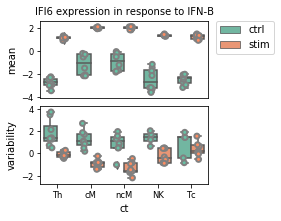

In [58]:
plot_bar_strip('IFI6', ct_to_include=None)
# plt.ylim(-1)
plt.savefig(fig_path + 'across_ct_{}.pdf'.format('IFI6'), bbox_inches='tight')

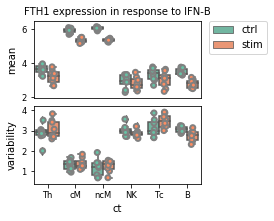

In [257]:
plot_bar_strip('FTH1', ct_to_include=None)
# plt.savefig(fig_path + 'across_ct_{}.pdf'.format('SAT1'), bbox_inches='tight')

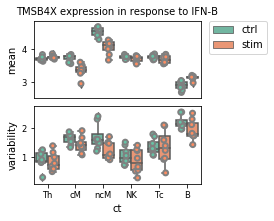

In [256]:
plot_bar_strip('TMSB4X', ct_to_include=None)
# plt.savefig(fig_path + 'across_ct_{}.pdf'.format('SAT1'), bbox_inches='tight')

/data/home/anaconda3/envs/single_cell/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':


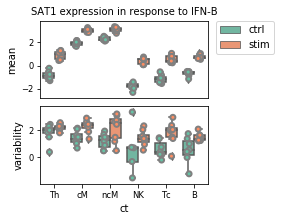

In [59]:
plot_bar_strip('SAT1', ct_to_include=None)
plt.savefig(fig_path + 'across_ct_{}.pdf'.format('SAT1'), bbox_inches='tight')

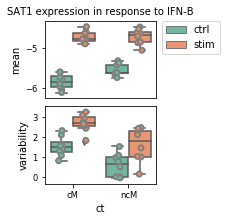

In [796]:
plt.figure(figsize=(2, 3))
plot_bar_strip('SAT1', ct_to_include=['CD14+ Monocytes', 'FCGR3A+ Monocytes'])
plt.savefig(fig_path + 'across_ct_{}.pdf'.format('SAT1_mono'), bbox_inches='tight')

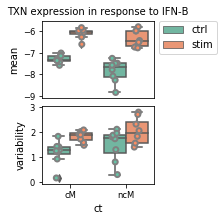

In [832]:
plt.figure(figsize=(2, 3))
plot_bar_strip('TXN', ct_to_include=['CD14+ Monocytes', 'FCGR3A+ Monocytes'])
plt.savefig(fig_path + 'across_ct_{}.pdf'.format('TXN_mono'), bbox_inches='tight')

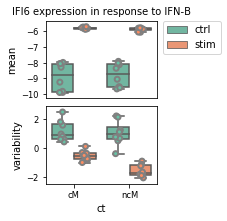

In [795]:
plt.figure(figsize=(2, 3))
plot_bar_strip('IFI6', ct_to_include=['CD14+ Monocytes', 'FCGR3A+ Monocytes'])
plt.savefig(fig_path + 'across_ct_{}.pdf'.format('IFI6_mono'), bbox_inches='tight')


### P-value calibrations

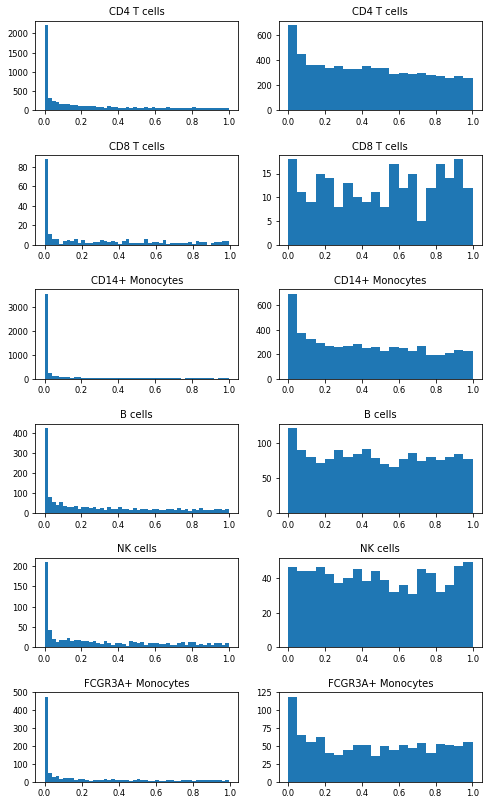

In [323]:
plt.figure(figsize=(8, 14))
plt.subplots_adjust(hspace=0.5)

for idx, ct in enumerate(['CD4 T cells', 'CD8 T cells', 'CD14+ Monocytes', 'B cells', 'NK cells', 'FCGR3A+ Monocytes']):
    
    plt.subplot(6, 2, 2*idx+1);
    plt.hist(adata_dict[ct].uns['schypo']['1d_ht']['mean_asl'], bins=50);
    plt.title('{}'.format(ct))
    
    plt.subplot(6, 2, 2*idx+2);
    plt.hist(adata_dict[ct].uns['schypo']['1d_ht']['var_asl'], bins=20);
    plt.title('{}'.format(ct))
# plt.savefig(fig_path + 'de_dv_calibration.pdf', bbox_inches='tight')

### tSNE visualizations

In [293]:
ct = 'CD14+ Monocytes'

In [353]:
norm_adata = adata.copy()
norm_adata = norm_adata[norm_adata.obs.cell == ct].copy()
norm_adata = norm_adata.copy()
sc.pp.normalize_total(norm_adata, target_sum=1e4)
# sc.pp.log1p(norm_adata)


schypo.create_groups(temp_adata, label_columns=['stim'], inplace=True, q=0.07)
schypo.compute_1d_moments(
    temp_adata, 
    inplace=True, 
    filter_genes=True,
    filter_mean_thresh=0.07, 
    min_perc_group=.7)
print('Number of genes kept for {}: {}'.format(ct, temp_adata.shape[1]))


Number of genes kept for CD14+ Monocytes: 1877


In [354]:
dv_genes = ht_result_1d_dict[ct].query('dv_fdr < 0.1').gene.tolist()
de_genes = ht_result_1d_dict[ct].query('de_fdr < 0.05').gene.tolist()

In [798]:
df = temp_adata.var.copy()
df['res_var'] = temp_adata.uns['schypo']['1d_moments']['sg^stim'][2]
df['mean'] = temp_adata.uns['schypo']['1d_moments']['sg^stim'][0]
df['gene'] = df.index.tolist()
df = df.merge( ht_result_1d_dict[ct], on='gene', how='left')
df = df[['gene','mean', 'de_coef', 'de_fdr', 'dv_coef', 'dv_fdr', 'distance']].copy()

In [799]:
df.columns

Index(['gene', 'mean', 'de_coef', 'de_fdr', 'dv_coef', 'dv_fdr', 'distance'], dtype='object')

In [814]:
df.sort_values('mean', ascending=False).query('dv_fdr < 0.1 & de_coef > 0').head(20)

,gene,mean,de_coef,de_fdr,dv_coef,dv_fdr,distance
0,ISG15,0.053311,4.849958,0.000007,-1.381630,0.009847,0.0
1527,CCL2,0.018918,1.539876,0.000007,-0.843775,0.000292,779924.0
1831,APOBEC3A,0.009533,3.731380,0.000004,-0.877491,0.006780,1319.0
811,SAT1,0.009400,1.099952,0.000007,1.160220,0.002433,9284.0
1421,ISG20,0.008701,3.588156,0.000004,-1.198426,0.001513,0.0
1039,IFITM3,0.007001,3.708360,0.000004,-1.604233,0.003877,0.0
217,RSAD2,0.004547,4.979162,0.000010,-1.553954,0.004650,0.0
1020,IFIT3,0.004432,4.928145,0.000004,-1.205761,0.062194,0.0
876,IDO1,0.004197,4.111858,0.000012,-1.512349,0.004200,1518982.0
915,LY6E,0.003880,3.828250,0.000004,-2.112450,0.002903,1558.0


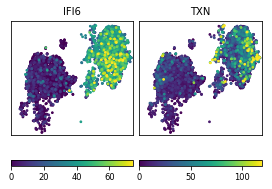

In [820]:
ct = 'CD14+ Monocytes'
gene_1, gene_2 = 'IFI6', 'TXN'
dat = norm_adata[(norm_adata.obs.cell == ct)]

plt.figure(figsize=(4.5, 3))
plt.subplots_adjust(wspace=0.05)
plt.subplot(1, 2, 1)
variability_scatter(X=dat.obsm['X_tsne'], c=dat[:, gene_1].X.todense().A1, xlim=(-40, 20), ylim=(3, 40), s=3)
plt.title(gene_1)
plt.subplot(1, 2, 2)
variability_scatter(X=dat.obsm['X_tsne'], c=dat[:, gene_2].X.todense().A1, xlim=(-40, 20), ylim=(3, 40), s=3)
plt.title(gene_2)
plt.savefig(fig_path + 'TXN_IFI6_variability.png', bbox_inches='tight')

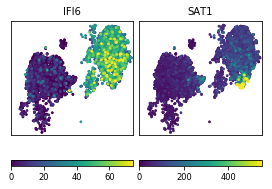

In [819]:
ct = 'CD14+ Monocytes'
gene_1, gene_2 = 'IFI6', 'SAT1'
dat = norm_adata[(norm_adata.obs.cell == ct)]

plt.figure(figsize=(4.5, 3))
plt.subplots_adjust(wspace=0.05)
plt.subplot(1, 2, 1)
variability_scatter(X=dat.obsm['X_tsne'], c=dat[:, gene_1].X.todense().A1, xlim=(-40, 20), ylim=(3, 40), s=3)
plt.title(gene_1)
plt.subplot(1, 2, 2)
variability_scatter(X=dat.obsm['X_tsne'], c=dat[:, gene_2].X.todense().A1, xlim=(-40, 20), ylim=(3, 40), s=3)
plt.title(gene_2)
plt.savefig(fig_path + 'SAT1_IFI6_variability.png', bbox_inches='tight')

In [303]:
norm_adata = adata.copy()
sc.pp.normalize_total(norm_adata, target_sum=1e4)

             gene_ids     mt     hb  n_cells_by_counts  mean_counts  \
626   ENSG00000204525  False  False  23534              5.866129      
1528  ENSG00000108688  False  False  2148               1.198841      

      log1p_mean_counts  pct_dropout_by_counts  total_counts  \
626   1.92660            4.616382               144735.0       
1528  0.78793            91.294127              29579.0        

      log1p_total_counts    res_var  ...   gene   de_coef       de_pval  \
626   11.882667           0.427133   ...  HLA-C  0.438640  5.660027e-07   
1528  10.294854           16.452070  ...  CCL7   2.237434  3.190720e-07   

       dv_coef  dv_pval    de_fdr    dv_fdr  isgf3_binding gene_type  ct  
626  -0.470037  0.39776  0.000003  0.772670  False          upreg     cM  
1528 -0.656460  0.00048  0.000002  0.013082  False          upreg     cM  

[2 rows x 21 columns]


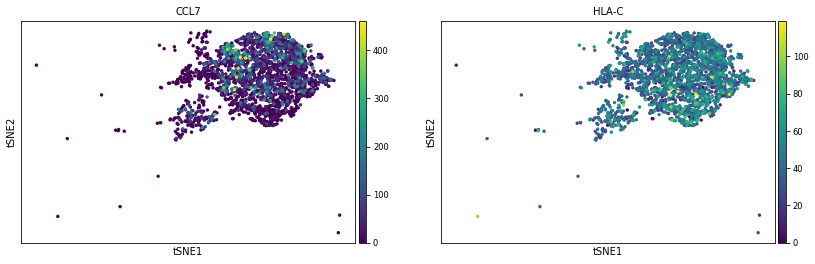

In [314]:
ct = 'CD14+ Monocytes'
gene_1, gene_2 = 'CCL7', 'HLA-C'
print(df[df.gene.isin([gene_1, gene_2])])
sc.pl.tsne(norm_adata[(norm_adata.obs.stim == 'stim') & (norm_adata.obs.cell == ct)], color=[gene_1, gene_2])

In [325]:
def variability_scatter(X, c, xlim=None, ylim=None, s=5):
    
    order = np.argsort(c)
    c = np.clip(c, a_min=0, a_max=np.quantile(c, 0.995))
    plt.scatter(X[order, 0], X[order, 1], c=c[order], cmap='viridis', s=s)

    plt.colorbar(orientation='horizontal');
    if xlim is not None and ylim is not None:
        plt.xlim(xlim);
        plt.ylim(ylim);
    plt.xticks([]); plt.yticks([]);
    
def expr_violin(adata, gene_1, gene_2):
    
    df_1 = pd.DataFrame()
    df_1['expr'] = adata[:, gene_1].X.toarray().ravel()
    df_1['gene'] = gene_1
    
    df_2 = pd.DataFrame()
    df_2['expr'] = adata[:, gene_2].X.toarray().ravel()
    df_2['gene'] = gene_2
    
    sns.violinplot(x='gene', y='expr', data=pd.concat([df_1, df_2]))
    
    

In [187]:
list(plt.cm.get_cmap('tab10'))

TypeError: 'ListedColormap' object is not iterable

In [188]:
cmap = plt.cm.get_cmap('tab10')
cmap2 = plt.cm.get_cmap('Set3')

In [191]:
cmap_master = [cmap(i) for i in range(10)] + [cmap2(i) for i in range(10)]

In [214]:
cmap_master = ['cornflowerblue','tab:orange','tab:green','tab:red','blueviolet',
               'tab:brown','tab:pink','tab:gray','tab:olive','tab:cyan',
              'lightcoral','gold','lightgreen','deeppink','dodgerblue',
              'tab:blue','tab:purple']

In [215]:
len(cmap_master)

17

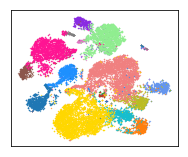

In [248]:
plt.figure(figsize=(3, 2.5))
for i,group in enumerate(adata.obs.cell_type.sort_values(ascending=False).drop_duplicates()):
    
    temp = adata[adata.obs.cell_type == group]
    plt.scatter(temp.obsm['X_tsne'][:, 0],temp.obsm['X_tsne'][:, 1], c=cmap_master[i], s=0.1, alpha=1)
    plt.xticks([]);plt.yticks([])
plt.savefig(fig_path + 'all_ct_tsne.png', bbox_inches='tight')

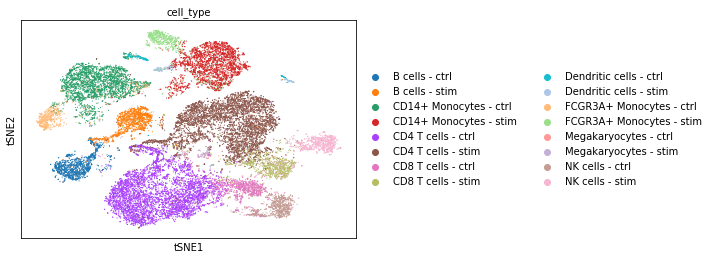

In [240]:
sc.pl.tsne(adata, color='cell_type')

Text(0.5, 1.0, 'APOBEC3A')

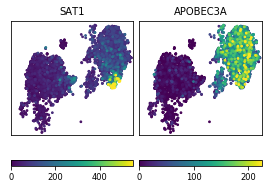

In [283]:
ct = 'CD14+ Monocytes'
gene_1, gene_2 = 'SAT1', 'APOBEC3A'
dat = norm_adata[(norm_adata.obs.cell == ct)]

plt.figure(figsize=(4.5, 3))
plt.subplots_adjust(wspace=0.05)
plt.subplot(1, 2, 1)
variability_scatter(X=dat.obsm['X_tsne'], c=dat[:, gene_1].X.todense().A1, xlim=(-40, 20), ylim=(3, 40), s=3)
plt.title(gene_1)
plt.subplot(1, 2, 2)
variability_scatter(X=dat.obsm['X_tsne'], c=dat[:, gene_2].X.todense().A1, xlim=(-40, 20), ylim=(3, 40), s=3)
plt.title(gene_2)
# plt.savefig(fig_path + 'SAT1_APOBEC3A_variability.png', bbox_inches='tight')

In [344]:
df.columns

Index(['gene_ids', 'mt', 'hb', 'n_cells_by_counts', 'mean_counts',
       'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts',
       'log1p_total_counts', 'res_var', 'mean', 'gene', 'de_coef', 'de_pval',
       'dv_coef', 'dv_pval', 'de_fdr', 'dv_fdr', 'isgf3_binding', 'gene_type',
       'ct'],
      dtype='object')

           mean   de_coef        de_fdr   dv_coef    dv_fdr
811   20.023121  1.099953  3.214645e-06  0.814596  0.012093
1831  20.346989  3.731380  9.176641e-07 -1.527488  0.000225


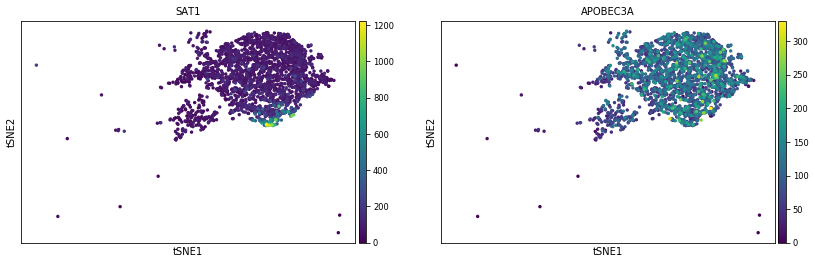

In [345]:

ct = 'CD14+ Monocytes'
gene_1, gene_2 = 'SAT1', 'APOBEC3A'
print(df[['mean', 'de_coef', 'de_fdr', 'dv_coef', 'dv_fdr']][df.gene.isin([gene_1, gene_2])])
sc.pl.tsne(norm_adata[(norm_adata.obs.stim == 'stim') & (norm_adata.obs.cell == ct)], color=[gene_1, gene_2])

            gene_ids     mt     hb  n_cells_by_counts  mean_counts  \
99   ENSG00000162645  False  False  7840               0.498521      
469  ENSG00000163734  False  False  1665               0.330929      

     log1p_mean_counts  pct_dropout_by_counts  total_counts  \
99   0.404478           68.224375              12300.0        
469  0.285877           93.251733              8165.0         

     log1p_total_counts    res_var  ...   gene   de_coef       de_pval  \
99   9.417436            0.697276   ...  GBP2   0.866642  3.944090e-06   
469  9.007734            19.588949  ...  CXCL3 -1.247853  4.603380e-07   

      dv_coef   dv_pval    de_fdr    dv_fdr  isgf3_binding gene_type  ct  
99  -0.220630  0.007400  0.000009  0.100839  False          upreg     cM  
469  0.081091  0.540546  0.000003  0.833955  False          upreg     cM  

[2 rows x 21 columns]


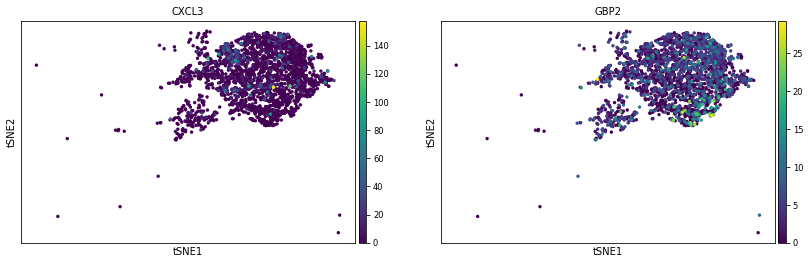

In [311]:
ct = 'CD14+ Monocytes'
gene_1, gene_2 = 'CXCL3', 'GBP2'
print(df[df.gene.isin([gene_1, gene_2])])
sc.pl.tsne(norm_adata[(norm_adata.obs.stim == 'stim') & (norm_adata.obs.cell == ct)], color=[gene_1, gene_2])

### Calibration

In [196]:
%%time

ct = 'NK cells'
print('Processing:', ct)
adata_test = adata[adata.obs.cell == ct].copy()


# adata_test.obs['stim'] = np.random.choice(adata_test.obs['stim'], adata_test.shape[0])
schypo.create_groups(adata_test, label_columns=['stim', 'ind'], inplace=True, q=0.07)
schypo.compute_1d_moments(
    adata_test, 
    inplace=True, 
    filter_genes=True,
    filter_mean_thresh=0.0, 
    min_perc_group=.9)
print('Number of genes kept for {}: {}'.format(ct, adata_test.shape[1]))
schypo.ht_1d_moments(
    adata_test, 
    formula_like='1 + stim',
    cov_column='stim', 
    num_boot=5000, 
    verbose=1,
    num_cpus=6)

Processing: NK cells
Number of genes kept for NK cells: 816


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  64 tasks      | elapsed:    2.8s
[Parallel(n_jobs=6)]: Done 364 tasks      | elapsed:   15.2s


CPU times: user 4.99 s, sys: 164 ms, total: 5.15 s
Wall time: 35.7 s


[Parallel(n_jobs=6)]: Done 816 out of 816 | elapsed:   34.8s finished


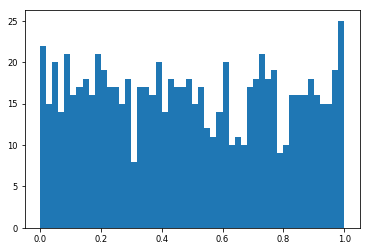

In [197]:
plt.hist(adata_test.uns['schypo']['1d_ht']['var_asl'], bins=50);

In [198]:
df = schypo.get_1d_ht_result(adata_test)
df['dv_fdr'] = util._fdrcorrect(df['dv_pval'])

In [199]:
df.query('gene == "SAT1"')

,gene,de_coef,de_pval,dv_coef,dv_pval,dv_fdr


In [200]:
df.query('dv_fdr < 0.1')

,gene,de_coef,de_pval,dv_coef,dv_pval,dv_fdr
211,CDKN2AIP,-0.001883,0.812238,-1.638334,0.000080,0.058006
219,GZMK,1.246177,0.000187,1.860377,0.000142,0.058006
